### Oh Ern Qi , S10243067K, DS01

# Vermicompost Clustering Models

These models will be built using the tank 1 , 8 - 10 April vermicompost dataset

In [17]:
# import the required packages
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt 
import scipy.stats as stats
from sklearn.decomposition import PCA 
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering 
from sklearn.preprocessing import StandardScaler, normalize 
from sklearn.metrics import silhouette_score 
import scipy.cluster.hierarchy as shc 
from feature_engine.transformation import YeoJohnsonTransformer
from sklearn.preprocessing import MinMaxScaler

In [18]:
# Load the dataset
file_path = 'combinedNew.csv'
data = pd.read_csv(file_path)

data.info(), data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 926 entries, 0 to 925
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Timestamp      926 non-null    object 
 1   Phosphorous01  926 non-null    float64
 2   Phosphorous02  926 non-null    float64
 3   Nitrogen01     926 non-null    float64
 4   Nitrogen02     926 non-null    float64
 5   Potassium01    926 non-null    float64
 6   Potassium02    926 non-null    float64
 7   Temp01         926 non-null    float64
 8   Hum01          926 non-null    float64
 9   SoilM01        926 non-null    float64
 10  SoilM02        926 non-null    float64
 11  pH Rod 1       926 non-null    float64
 12  pH Rod 2       926 non-null    float64
dtypes: float64(12), object(1)
memory usage: 94.2+ KB


(None,
                Timestamp  Phosphorous01  Phosphorous02  Nitrogen01  \
 0  10 Apr 2024, 10:00 AM          135.0          146.0       193.0   
 1  10 Apr 2024, 10:01 AM          133.0          131.0       172.0   
 2  10 Apr 2024, 10:02 AM          133.0          149.0       160.0   
 3  10 Apr 2024, 10:03 AM          178.0          185.0       162.0   
 4  10 Apr 2024, 10:04 AM          149.0          135.0       185.0   
 
    Nitrogen02  Potassium01  Potassium02  Temp01  Hum01  SoilM01  SoilM02  \
 0       193.0        193.0        193.0    27.4   99.0      1.0      1.0   
 1       145.0        156.0        145.0    27.4   93.0      1.0      1.0   
 2       145.0        142.0        140.0    27.4   97.0      1.0      1.0   
 3       143.0        193.0        173.0    27.4   98.0      1.0      1.0   
 4       162.0        181.0        187.0    27.4   95.0      1.0      1.0   
 
    pH Rod 1  pH Rod 2  
 0    187.72    188.35  
 1    187.72    184.07  
 2    183.96    185.05  
 

In [19]:
data['Timestamp'] = pd.to_datetime(data['Timestamp'], errors='coerce')
data['Time'] = data['Timestamp'].dt.time
data['Day'] = data['Timestamp'].dt.day


In [20]:
data['Avg_Phosphorous'] = (data['Phosphorous01'] + data['Phosphorous02']) / 2
data['Avg_Nitrogen'] = (data['Nitrogen01'] + data['Nitrogen02']) / 2
data['Avg_Potassium'] = (data['Potassium01'] + data['Potassium02']) / 2
data['Avg_pH'] = (data['pH Rod 1'] + data['pH Rod 2']) / 2

In [21]:
final_columns = [
    'Avg_Phosphorous', 'Avg_Nitrogen', 'Avg_Potassium', 'Avg_pH', 
    'Temp01', 'Hum01'
]

In [22]:
data[final_columns].isnull().sum()

Avg_Phosphorous    0
Avg_Nitrogen       0
Avg_Potassium      0
Avg_pH             0
Temp01             0
Hum01              0
dtype: int64

In [26]:
# Normalize the final data
scaler_final = StandardScaler()
data_final_normalized = scaler_final.fit_transform(data_final)

# Convert the normalized final data back to a DataFrame for clustering
data_final_normalized_df = pd.DataFrame(data_final_normalized, columns=final_columns)
data_final_normalized_df.head()

,Avg_Phosphorous,Avg_Nitrogen,Avg_Potassium,Avg_pH,Temp01,Hum01
0,0.016778,1.093948,1.105170,-0.042241,-1.307493,0.538869
1,-0.187648,0.249367,0.154898,-0.371843,-1.307493,0.194221
2,0.028803,0.102483,-0.057516,-0.585930,-1.307493,0.423986
3,1.002830,0.102483,0.881577,-0.662170,-1.307493,0.481427
4,0.052853,0.616576,0.903936,0.191868,-1.307493,0.309104


C:\Users\huohe\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\huohe\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
C:\Users\huohe\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\huohe\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environme

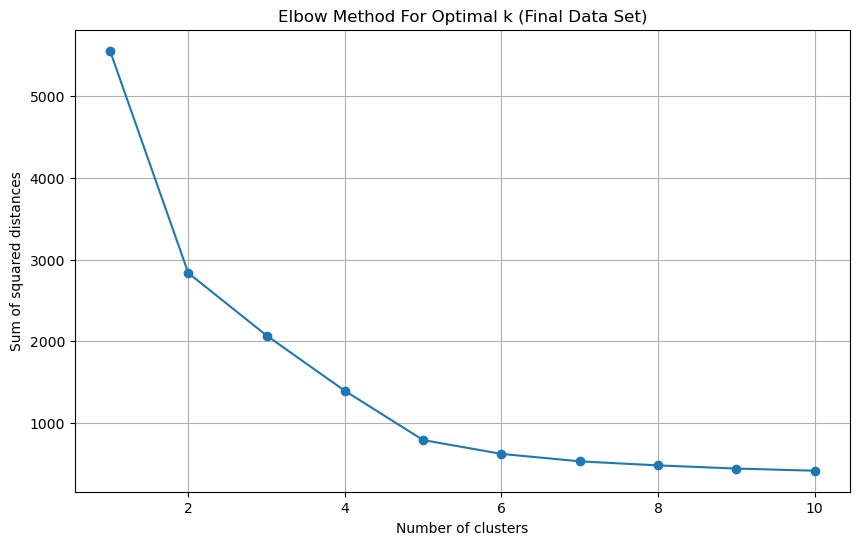

In [27]:
# Determine the optimal number of clusters using the elbow method for the adjusted dataset
inertia_final = []
k_range_final = range(1, 11)

for k in k_range_final:
    kmeans_final = KMeans(n_clusters=k, random_state=42)
    kmeans_final.fit(data_final_normalized)
    inertia_final.append(kmeans_final.inertia_)

# Plot the elbow curve for the final dataset
plt.figure(figsize=(10, 6))
plt.plot(k_range_final, inertia_final, marker='o')
plt.title('Elbow Method For Optimal k (Final Data Set)')
plt.xlabel('Number of clusters')
plt.ylabel('Sum of squared distances')
plt.grid(True)
plt.show()


In [28]:
# Perform K-means clustering with 4 clusters
kmeans_optimal = KMeans(n_clusters=4, random_state=42)
cluster_labels = kmeans_optimal.fit_predict(data_final_normalized)

# Add cluster labels to the normalized data
data_final_normalized_df['Cluster'] = cluster_labels

# Calculate the mean of each feature within each cluster
cluster_characteristics = data_final_normalized_df.groupby('Cluster').mean()
cluster_characteristics


C:\Users\huohe\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\huohe\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


,Avg_Phosphorous,Avg_Nitrogen,Avg_Potassium,Avg_pH,Temp01,Hum01
Cluster,,,,,,
0,0.442955,0.450624,0.428275,-0.058497,0.114199,0.354588
1,-2.073892,-2.122446,-2.044508,0.681591,-0.608044,-0.753377
2,0.438083,0.112100,0.311014,-0.074751,0.263695,-4.963186
3,-2.039502,-0.187204,-0.417129,-10.320216,0.690488,-0.562089


In [29]:
X_scaled = data_final_normalized  # This is your normalized data

# Initialize and fit the K-means model
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(X_scaled)

# Predict the cluster labels
y_pred = kmeans.predict(X_scaled)

# Retrieve the cluster labels directly from the model
labels = kmeans.labels_

# Calculate the silhouette score using the Euclidean metric
silhouette = silhouette_score(X_scaled, labels, metric='euclidean')

# Print the silhouette score
print('Silhouette Score: {:.3f}'.format(silhouette))

C:\Users\huohe\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\huohe\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


Silhouette Score: 0.683


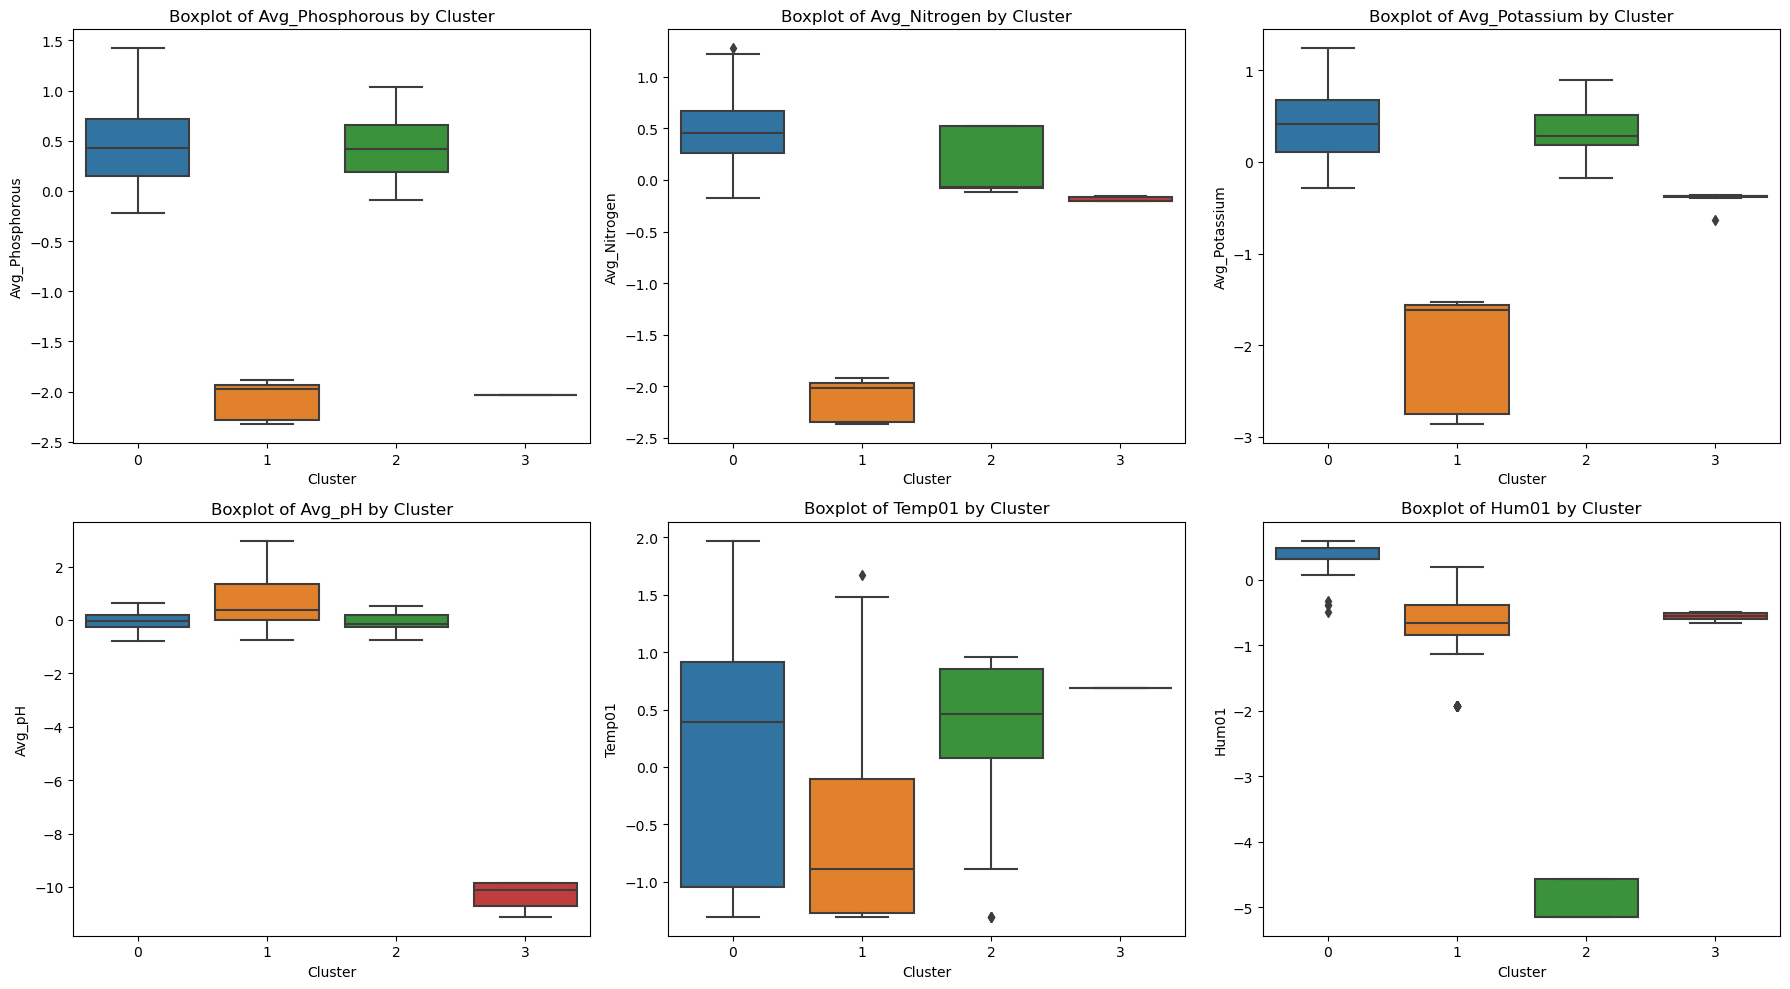

In [30]:
import seaborn as sns

# Set up the matplotlib figure
plt.figure(figsize=(18, 10))

# Create a boxplot for each feature by cluster
for i, column in enumerate(final_columns, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(x='Cluster', y=column, data=data_final_normalized_df)
    plt.title(f'Boxplot of {column} by Cluster')

plt.tight_layout()
plt.show()


## Cluster Analysis Summary

### Cluster 0
- **Nutrient Levels:** Exhibits moderate to high levels of phosphorous, nitrogen, and potassium, with potassium appearing particularly high.
- **pH Levels:** pH values are around the neutral range, neither extremely high nor low.
- **Temperature:** Shows moderate temperature values, neither extreme nor particularly varied.
- **Humidity:** Humidity is slightly on the lower side but within a moderate range.

### Cluster 1
- **Nutrient Levels:** This cluster shows lower levels of phosphorous and very low levels of nitrogen and potassium, indicating potentially nutrient-deficient conditions.
- **pH Levels:** pH values are mostly neutral, similar to Cluster 0.
- **Temperature:** Temperatures are moderate, with a range similar to Cluster 0.
- **Humidity:** Humidity levels are higher compared to other clusters, which could influence the absorption and mobility of nutrients in the soil.

### Cluster 2
- **Nutrient Levels:** Phosphorous and nitrogen levels are high, but potassium is markedly low, suggesting an imbalance in nutrient composition.
- **pH Levels:** Maintains a neutral pH, similar to the other clusters.
- **Temperature:** Shows a broader range of temperature values, possibly indicating variability in environmental conditions or measurement inconsistencies.
- **Humidity:** Humidity levels are moderate but show less variation compared to other clusters.

### Cluster 3
- **Nutrient Levels:** Appears to be extremely deficient in all nutrients, particularly potassium, which is significantly lower than other clusters.
- **pH Levels:** Shows extremely low pH levels, which could severely affect nutrient availability and plant health.
- **Temperature:** Temperature values are generally low, which could be impacting the biological processes in the soil, further affecting nutrient availability.
- **Humidity:** Humidity is very low, indicating dry conditions that can further complicate nutrient uptake by plants.


# Hierarchical Clustering

In [31]:
# Perform hierarchical/agglomerative clustering
Z = shc.linkage(data_final_normalized_df, method ='ward') 
Z # A condensed distance matrix

array([[6.92000000e+02, 7.00000000e+02, 0.00000000e+00, 2.00000000e+00],
       [4.83000000e+02, 4.88000000e+02, 1.54019449e-03, 2.00000000e+00],
       [4.89000000e+02, 4.95000000e+02, 3.08038897e-03, 2.00000000e+00],
       ...,
       [1.78900000e+03, 1.83600000e+03, 3.61556827e+01, 3.40000000e+01],
       [1.84700000e+03, 1.84800000e+03, 4.35237255e+01, 7.69000000e+02],
       [1.84600000e+03, 1.84900000e+03, 7.51868888e+01, 9.26000000e+02]])

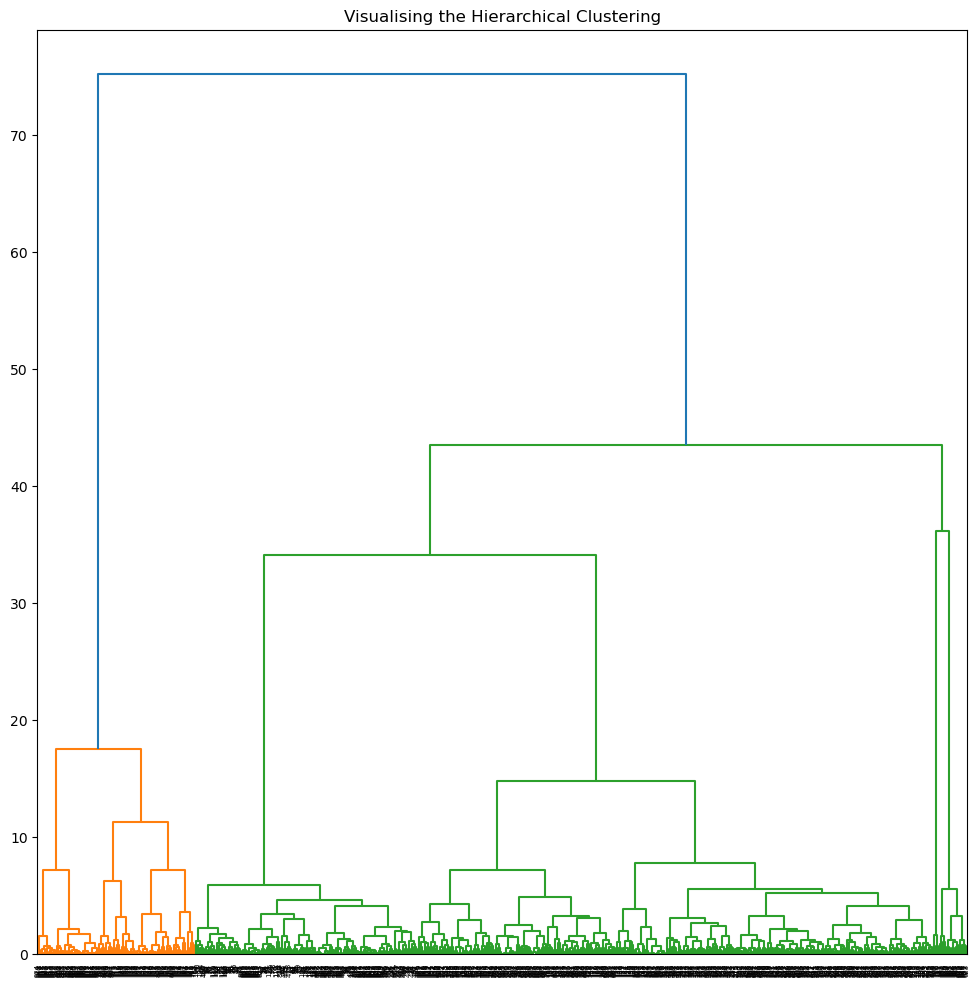

In [32]:
plt.figure(figsize =(12, 12)) 
plt.title('Visualising the Hierarchical Clustering') 
Dendrogram = shc.dendrogram(Z)

In [33]:
ac3 = AgglomerativeClustering(n_clusters = 4)
ac3

AgglomerativeClustering(n_clusters=4)

In [34]:
cluster_labels_ac3 = ac3.fit_predict(data_final_normalized)

In [35]:
data_final_normalized_df['Cluster_AC3'] = cluster_labels_ac3

In [36]:
silhouette_score(data_final_normalized,cluster_labels_ac3)

0.6826314239426203

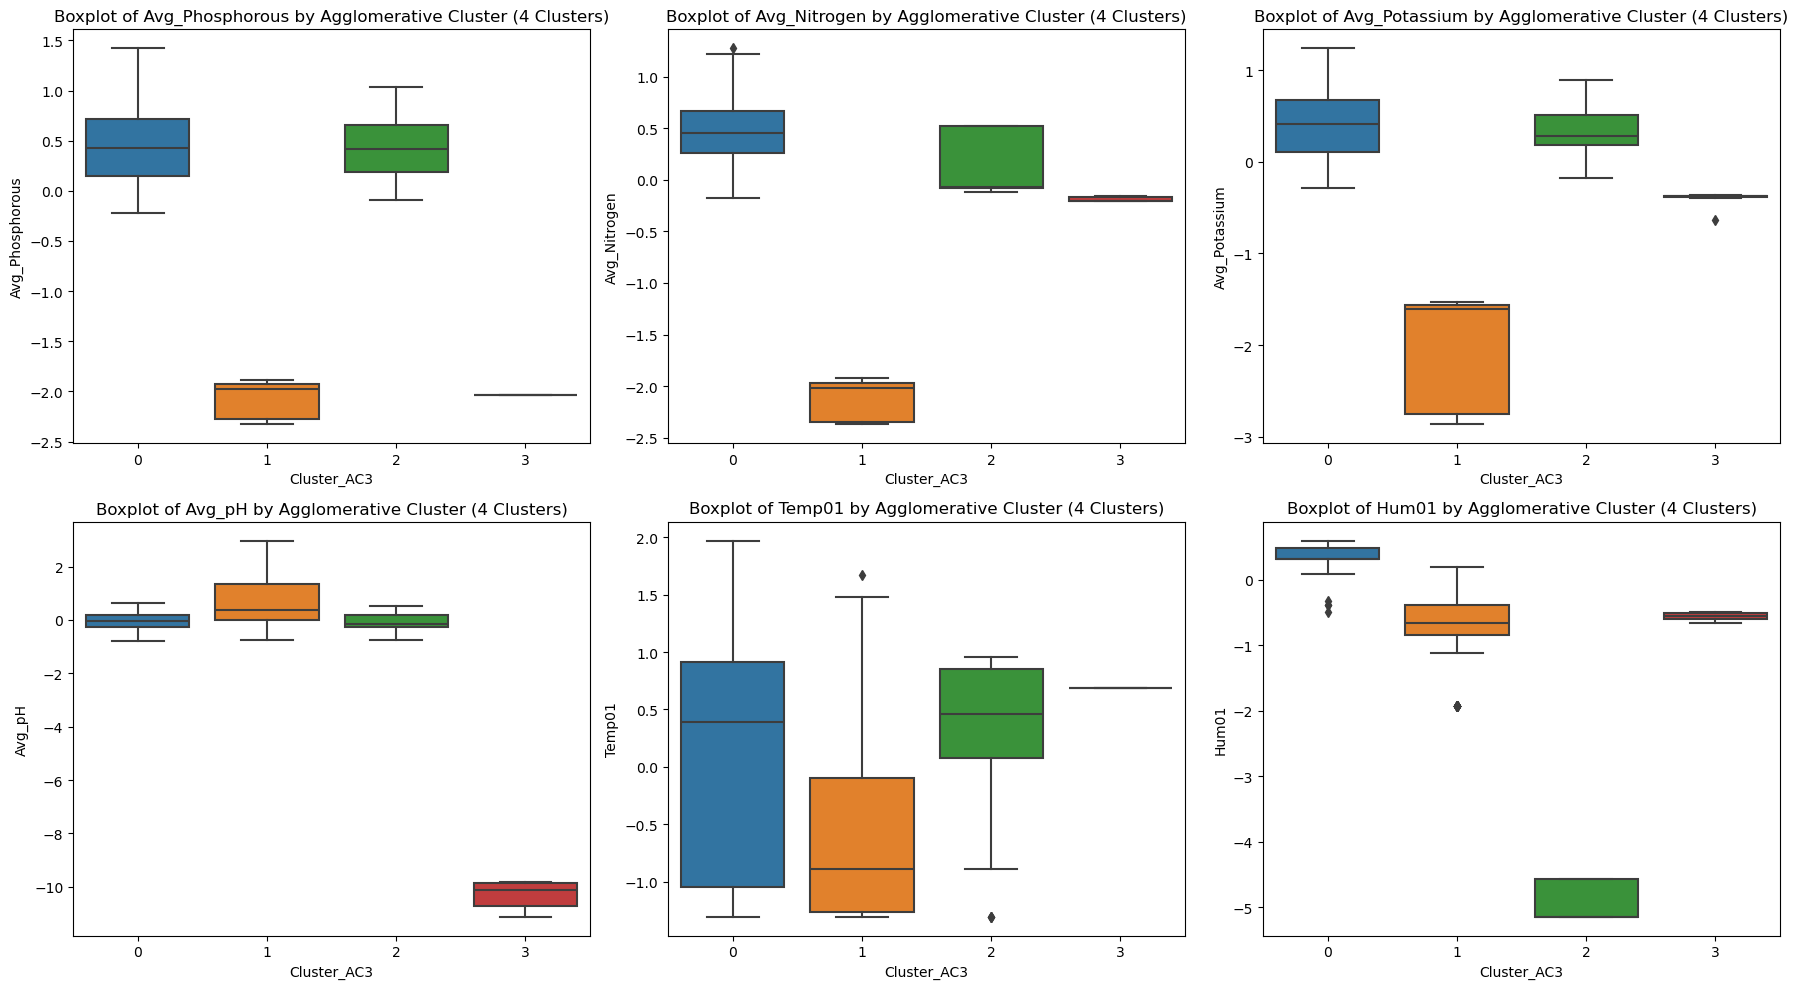

In [37]:
# Set up the matplotlib figure for agglomerative clustering with 3 clusters
plt.figure(figsize=(18, 10))

# Create a boxplot for each feature by agglomerative cluster
for i, column in enumerate(final_columns, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(x='Cluster_AC3', y=column, data=data_final_normalized_df)
    plt.title(f'Boxplot of {column} by Agglomerative Cluster (4 Clusters)')

plt.tight_layout()
plt.show()


## Agglomerative Clustering Analysis Summary 

### General Observations:
- Clusters exhibit variability across all parameters: Avg_Phosphorous, Avg_Nitrogen, Avg_Potassium, Avg_pH, Temp01, and Hum01.
- Certain clusters show extreme values, particularly in pH and nutrient levels, suggesting specific environmental conditions or treatments.

### Detailed Cluster Characteristics:

#### Cluster 0
- **Nutrient Levels:** Moderately high phosphorous and nitrogen levels, and slightly lower but still moderate potassium levels.
- **pH Levels:** pH values are well-balanced and around the neutral range.
- **Temperature:** Temperature levels are stable and moderate across the cluster.
- **Humidity:** Shows moderate humidity levels with minimal variation.

#### Cluster 1
- **Nutrient Levels:** Notably low levels of phosphorous, nitrogen, and potassium, suggesting a nutrient-deficient environment.
- **pH Levels:** pH is also relatively low, enhancing the challenging conditions for plant growth.
- **Temperature:** Moderate temperatures, similar to other clusters.
- **Humidity:** Exhibits higher humidity, which is not compensating for the low nutrient availability.

#### Cluster 2
- **Nutrient Levels:** Average levels of phosphorous and potassium, with nitrogen levels being the lowest among the clusters.
- **pH Levels:** pH values are quite variable but generally neutral.
- **Temperature:** This cluster has a wider temperature range, indicating possible environmental variability or different geographical locations.
- **Humidity:** Humidity is relatively high, potentially affecting soil moisture content and nutrient solubility.

#### Cluster 3
- **Nutrient Levels:** Phosphorous and potassium levels are moderately low, with nitrogen levels being higher than phosphorous but still not high.
- **pH Levels:** Shows the lowest pH values across all clusters, which could significantly impact nutrient availability and plant health.
- **Temperature:** Exhibits a broad range of temperatures, suggesting varying environmental conditions.
- **Humidity:** Lowest humidity among the clusters, which may exacerbate the low pH's negative impact on nutrient availability.


